# Unit 5 - Financial Planning

In [1]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv('key.env')

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc=1.2 
my_eth= 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
response_btc = requests.get(btc_url)
data_btc = response_btc.json()
btc_price = data_btc['data']['1']['quotes']['CAD']['price']

In [60]:
btc_price

36891.426

In [6]:
# Fetch current ETH price
response_eth = requests.get(eth_url)
data_eth = response_eth.json()
eth_price = data_eth['data']['1027']['quotes']['CAD']['price']

In [61]:
eth_price

2335.492445

In [7]:
# Compute current value of my crpto
# YOUR CODE HERE!
def calculate_crpyto(my_btc,my_eth,btc_price,eth_price
                    ):
    cal_btc=my_btc * btc_price
    cal_eth=my_eth * eth_price
    return cal_btc , cal_eth

cal_btc, cal_eth = calculate_crpyto(my_btc, my_eth, btc_price, eth_price)
    


In [62]:

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${cal_btc:0.2f}")
print(f"The current value of your {my_eth} ETH is ${cal_eth:0.2f}")
total_value_crypto= cal_btc + cal_eth

The current value of your 1.2 BTC is $44269.71
The current value of your 5.3 ETH is $12378.11


In [63]:
total_value_crypto = round(total_value_crypto,2)

In [65]:
print(f"The current Total value of your crypto assets is ${total_value_crypto}")

The current Total value of your crypto assets is $56647.82


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [11]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
# YOUR CODE HERE!

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [12]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2023-03-27", tz="America/New_York").isoformat()


# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!

df_portfolio = api.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame

# Separate ticker data
# YOUR CODE HERE!
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_portfolio_all = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])


In [13]:
# Preview DataFrame
# YOUR CODE HERE!
df_portfolio_all.head()

AGG                                              \
                            open   high    low    close   volume trade_count   
timestamp                                                                      
2023-03-27 04:00:00+00:00  99.39  99.52  99.11  99.2056  4130805       21378   

                                         SPY                                   \
                                vwap    open    high     low  close    volume   
timestamp                                                                       
2023-03-27 04:00:00+00:00  99.349963  398.12  398.92  395.56  397.5  48178044   

                                                  
                          trade_count       vwap  
timestamp                                         
2023-03-27 04:00:00+00:00      445133  397.14702

In [14]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of FB and TWTR
df_closing_prices["AGG"] = df_portfolio_all["AGG"]["close"]
df_closing_prices["SPY"] = df_portfolio_all["SPY"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices.head(10)




AGG    SPY
2023-03-27  99.2056  397.5

In [15]:
# Print AGG and SPY close prices
agg_close_price = float(df_closing_prices["AGG"])
spy_close_price =float(df_closing_prices["SPY"])
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $99.2056
Current SPY closing price: $397.5


In [16]:
# Compute the current value of shares
# YOUR CODE HERE!
def calculate_value_share(my_agg,my_spy,agg_close_price,spy_close_price):
    my_spy_value= my_spy * spy_close_price
    my_agg_value = my_agg * agg_close_price
    return my_agg_value , my_spy_value


In [17]:
my_spy_value , my_agg_value = calculate_value_share(my_agg,my_spy,agg_close_price,spy_close_price)
total_value_share = my_agg_value + my_spy_value
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19841.12
The current value of your 200 AGG shares is $19875.00


In [18]:
total_value_share = round(total_value_share,2)

In [66]:
print(f"The current Total value of your shares assets is ${total_value_share}")

The current Total value of your shares assets is $39716.12


### Savings Health Analysis

In [20]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income=12000

# Consolidate financial assets data
# YOUR CODE HERE!
#the crypto assets in the first row and the total value of the shares in the second row.
# Set current amount of shares data
shares_data = {
    "Assets": [6.5, 250]
}

# Set the tickers
tickers = ["Crypto", "Shares"]
# Create savings DataFrame
# Create the shares DataFrame with `tickers` as index
df_savings = pd.DataFrame(shares_data, index=tickers)
# Display shares data

df_savings['Total Amount $']=[total_value_crypto, total_value_share]

# Display savings DataFrame
#display
df_savings

Assets  Total Amount $
Crypto     6.5        56647.82
Shares   250.0        39716.12

<Figure size 600x600 with 0 Axes>

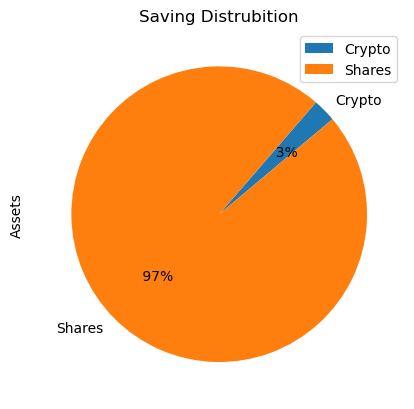

In [21]:
# Plot savings pie chart
# YOUR CODE HERE!
plt.figure(figsize=(6, 6))
df_savings.plot.pie(y="Assets", title="Saving Distrubition",autopct='%3.0f%%', startangle=40)
plt.show()

In [23]:
# Set ideal emergency fund
total_saving =df_savings['Total Amount $'].values.sum()
monthly_income = 12000
# Calculate total amount of savings
# YOUR CODE HERE!
#4. Use `if` conditional statements to validate if the current savings are enough for an emergency fund. An
#ideal emergency fund should be equal to three times your monthly income/
#   * If total savings are greater than the emergency fund, display a 
#   message congratulating the person for having enough money in this fund.
#    * If total savings are equal to the emergency fund, display a 
#   message congratulating the person on reaching this financial goal.
#   * If total savings are less than the emergency fund, display 
 #  a message showing how many dollars away the person is from reaching the goal.

def check_current_saving(total_saving, monthly_income):
    emergency_fund = 3 * monthly_income
    if total_saving > emergency_fund:
        print('Congratulations for having enough money in this fund!')
    elif total_saving == emergency_fund:
        print('Congratulations on reaching your financial goal!')
    else:
        print('You are $' + str(emergency_fund - total_saving) + ' away from reaching your financial goal.')

In [25]:
#testing the Tools for saving by grabbing the total amount of saving in df_savings
check_current_saving(1000000,12000)

Congratulations for having enough money in this fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [26]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [27]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"
# YOUR CODE HERE!
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_tickers = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df



# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG = df_tickers[df_tickers['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_tickers[df_tickers['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stock_data = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])
# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.92  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.52  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  204.99  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.56  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.08  205.77  203.88   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2016-05-02 04:00:00+00:00  207.9700   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.1592  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  205.0100   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.9700   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.7200   89131004      340335  204.937074

In [29]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thiertyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [30]:
# Printing the simulation input data
# YOUR CODE HERE!
# Printing the simulation input data
MC_thiertyear.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [32]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thiertyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/mac/Desktop/UofT/challenge_5/Challenge__5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3          4         5         6    \
0     1.000000  1.000000  1.000000  1.000000   1.000000  1.000000  1.000000   
1     1.004556  0.997589  1.001755  0.999268   0.999355  1.007727  0.999315   
2     1.003601  1.007804  1.004089  0.995782   1.001319  1.002602  1.000937   
3     1.009958  1.012706  1.006793  0.992883   1.010026  0.996668  1.004947   
4     1.017888  1.014484  1.003053  1.000185   1.017751  0.991813  0.997972   
...        ...       ...       ...       ...        ...       ...       ...   
7556  7.689859  7.752675  3.734273  8.125415  10.656477  5.765545  7.185992   
7557  7.734436  7.761478  3.720462  8.113272  10.671192  5.805569  7.143423   
7558  7.750232  7.753053  3.734203  8.066662  10.705068  5.799537  7.099238   
7559  7.792143  7.739777  3.739250  8.059787  10.758835  5.794330  7.105931   
7560  7.796857  7.709296  3.740611  8.067572  10.819320  5.837232  7.094862   

           7         8         9    ...       490       491        492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000   1.000000   
1     1.001884  1.003118  1.000572  ...  1.002562  0.993561   1.001653   
2     0.994207  1.001301  0.994750  ...  0.997155  0.993204   0.998666   
3     0.994912  0.995351  0.991364  ...  0.999162  0.999343   0.994545   
4     1.002479  0.992245  0.993761  ...  0.999526  0.991773   0.988362   
...        ...       ...       ...  ...       ...       ...        ...   
7556  4.222073  7.180593  2.889951  ...  5.553246  5.313092  11.630351   
7557  4.204316  7.165141  2.872238  ...  5.549285  5.319420  11.641584   
7558  4.187667  7.246958  2.871541  ...  5.537233  5.329089  11.614741   
7559  4.210731  7.279572  2.855131  ...  5.513866  5.302474  11.725538   
7560  4.213240  7.306344  2.823318  ...  5.527500  5.228789  11.661665   

            493       494       495       496       497       498        499  
0      1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   1.000000  
1      1.005307  0.998671  0.994955  1.000403  1.000293  0.995854   0.996619  
2      1.013133  1.003921  0.994413  0.998557  0.988988  0.994203   1.002919  
3      1.015406  1.001142  0.995091  1.000805  0.993257  1.000698   1.009887  
4      1.017149  0.996300  0.996853  1.006768  0.993969  1.001428   1.019190  
...         ...       ...       ...       ...       ...       ...        ...  
7556  11.067624  8.375360  7.996200  7.276089  5.984208  8.176688  12.006787  
7557  11.112830  8.324740  8.094658  7.263323  5.984176  8.155422  11.943077  
7558  11.110045  8.289554  8.084268  7.247249  5.994369  8.111096  11.959849  
7559  11.142711  8.295993  8.047103  7.270135  5.982310  8.141253  11.914978  
7560  11.149301  8.269112  8.111294  7.301786  5.976400  8.126229  11.936966  

[7561 rows x 500 columns]

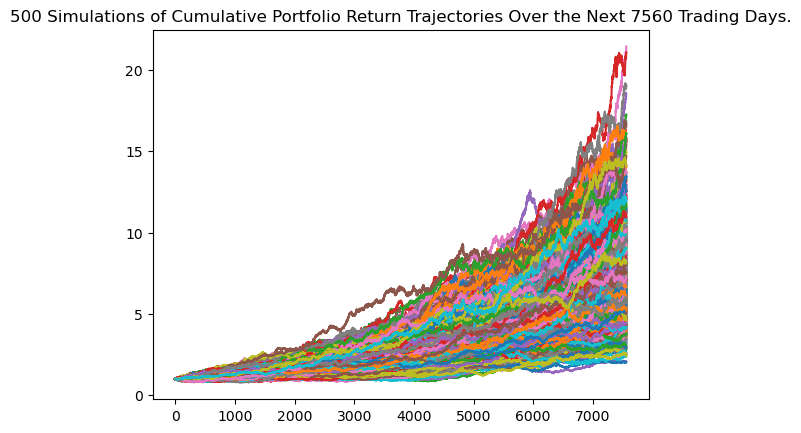

In [33]:
# Plot simulation outcomes
# YOUR CODE HERE!
# Plot simulation outcomes
line_plot = MC_thiertyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_thiertyear_sim_plot.png", bbox_inches="tight")

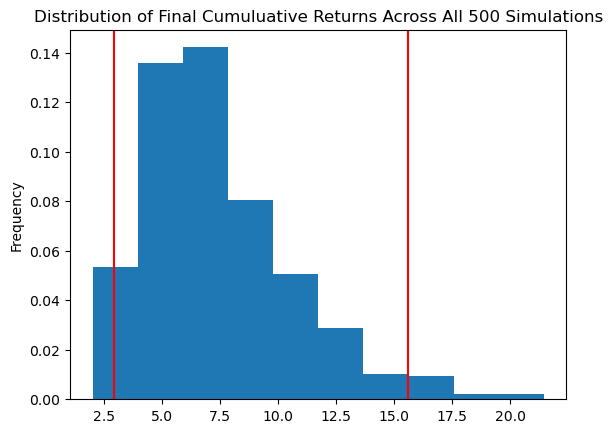

In [34]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thiertyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_thiertyear_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats_monte = MC_thiertyear.summarize_cumulative_return()

# Print summary statistics
print(summary_stats_monte)

count           500.000000
mean              7.418858
std               3.191011
min               2.030486
25%               5.128641
50%               6.882164
75%               9.172782
max              21.434087
95% CI Lower      2.935226
95% CI Upper     15.604894
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [38]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(summary_stats_monte[8]*20000,2)
ci_upper = round(summary_stats_monte[9]*20000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $58704.52 and $312097.88


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [41]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(summary_stats_monte[8]*(20000)*1.5,2)
ci_upper = round(summary_stats_monte[9]*(20000)*1.5,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $88056.78 and $468146.81


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [42]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [44]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/mac/Desktop/UofT/challenge_5/Challenge__5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.004050  0.993818  0.992145  0.997397  1.005407  0.993157  1.000339   
2     1.015505  0.987932  0.989386  0.995995  1.000817  0.987738  1.001271   
3     1.010221  0.993544  0.990012  0.999401  0.992197  0.985969  1.002464   
4     1.011794  0.994652  0.989498  0.999012  0.990580  0.986161  1.003872   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.505775  1.099746  1.372629  1.384557  1.513052  1.635295  1.478559   
1257  1.503533  1.105197  1.368609  1.386102  1.528368  1.653528  1.467455   
1258  1.497981  1.111561  1.374157  1.384304  1.535234  1.658809  1.468833   
1259  1.498885  1.117943  1.383080  1.393727  1.541448  1.657764  1.466422   
1260  1.501384  1.117133  1.368721  1.397668  1.544096  1.661622  1.465683   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.998316  1.008302  0.993194  ...  1.000174  1.005975  1.004090   
2     0.990666  1.004348  0.998380  ...  1.005493  1.000765  1.008900   
3     0.984571  1.009458  0.996995  ...  1.008999  1.005137  1.007543   
4     0.985153  1.013553  1.003173  ...  1.007016  1.010168  1.010150   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.629534  1.205095  1.483313  ...  1.562286  1.249992  1.176390   
1257  1.631360  1.204430  1.492823  ...  1.559718  1.252464  1.173476   
1258  1.626560  1.204212  1.500335  ...  1.554645  1.260124  1.169581   
1259  1.627544  1.207729  1.503358  ...  1.545152  1.264948  1.163623   
1260  1.628330  1.216108  1.513342  ...  1.549631  1.266784  1.164599   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.010174  0.997160  1.005305  1.002167  0.997761  1.001421  1.003163  
2     1.020584  0.999717  1.003514  1.008620  0.992295  1.004047  1.002635  
3     1.023629  1.004988  1.009787  1.008319  0.989235  1.003915  0.997097  
4     1.031443  1.010367  1.018546  1.018784  0.989717  0.997114  0.998960  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.615202  1.567735  1.309131  1.116260  1.349913  1.755759  1.485285  
1257  1.622502  1.564796  1.313166  1.123099  1.346077  1.759271  1.478092  
1258  1.621693  1.556051  1.309593  1.132753  1.345833  1.756342  1.489413  
1259  1.632008  1.542505  1.324448  1.146110  1.341268  1.762043  1.480870  
1260  1.632024  1.546809  1.320759  1.139653  1.339690  1.770073  1.481704  

[1261 rows x 500 columns]

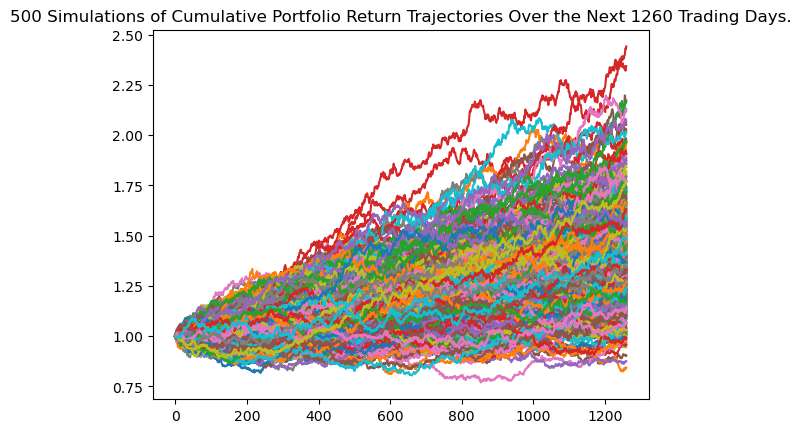

In [45]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

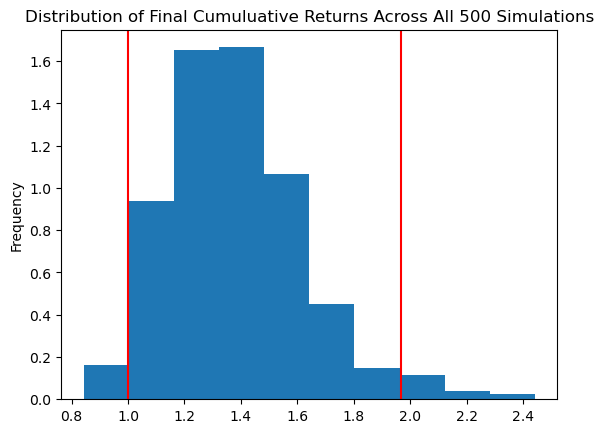

In [46]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()
# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

In [47]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary_stats_five = MC_fiveyear.summarize_cumulative_return()
# Print summary statistics
print(summary_stats_five)

count           500.000000
mean              1.380417
std               0.241567
min               0.843909
25%               1.203956
50%               1.350985
75%               1.525174
max               2.440984
95% CI Lower      1.000476
95% CI Upper      1.966005
Name: 1260, dtype: float64


In [52]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower_five = round(summary_stats_five[8]*60000,2)
ci_upper_five = round(summary_stats_five[9]*60000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $60028.59 and $117960.3


### Ten Years Retirement Option

In [54]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [55]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/mac/Desktop/UofT/challenge_5/Challenge__5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.001998  1.003170  0.990480  1.002621  1.003767  1.003479  1.008893   
2     1.004493  1.008467  0.989796  0.998968  1.000096  1.005639  1.013133   
3     1.006642  0.998393  1.000000  1.007288  1.002154  1.004599  1.007885   
4     1.013680  1.005440  0.996171  1.005103  1.001811  1.004991  1.010981   
...        ...       ...       ...       ...       ...       ...       ...   
2516  1.802812  2.642591  2.071892  1.580518  1.732883  1.697944  1.594996   
2517  1.810267  2.640039  2.059560  1.576250  1.734499  1.686987  1.592464   
2518  1.815382  2.628992  2.064218  1.576751  1.723952  1.681789  1.593728   
2519  1.814644  2.643069  2.076204  1.561990  1.711959  1.690424  1.606031   
2520  1.828185  2.650882  2.079715  1.558188  1.710763  1.691567  1.593220   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.000201  0.993800  0.987169  ...  1.003247  0.997377  1.001298   
2     1.000281  0.994576  0.978613  ...  1.008758  0.990787  1.009574   
3     0.997117  0.999049  0.980097  ...  1.000673  0.991057  1.004584   
4     0.994600  0.996874  0.987291  ...  1.004093  0.994107  1.004451   
...        ...       ...       ...  ...       ...       ...       ...   
2516  2.609132  1.845894  1.417694  ...  3.224171  1.643604  1.494863   
2517  2.598096  1.837528  1.412506  ...  3.241678  1.646313  1.503901   
2518  2.595481  1.839357  1.421793  ...  3.243565  1.644297  1.494275   
2519  2.605337  1.824945  1.421461  ...  3.240135  1.650749  1.493204   
2520  2.598699  1.820878  1.425656  ...  3.246496  1.644485  1.493244   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.999136  1.005262  0.998475  1.002100  1.002173  1.012263  0.994068  
2     0.998590  1.001898  0.997170  1.009378  0.998730  1.014464  1.003901  
3     0.998696  1.002924  1.001819  1.007789  0.998754  1.010419  1.000284  
4     0.995911  0.998940  1.001674  1.006751  1.005004  1.010368  1.002154  
...        ...       ...       ...       ...       ...       ...       ...  
2516  1.951080  1.826335  2.585637  2.642480  2.105777  1.884220  1.424070  
2517  1.953690  1.831055  2.588551  2.650969  2.114443  1.881375  1.438368  
2518  1.960350  1.825390  2.596918  2.622003  2.124129  1.875624  1.440150  
2519  1.936919  1.814491  2.608255  2.642012  2.110743  1.874865  1.428311  
2520  1.937538  1.806422  2.604807  2.652082  2.115872  1.877107  1.436968  

[2521 rows x 500 columns]

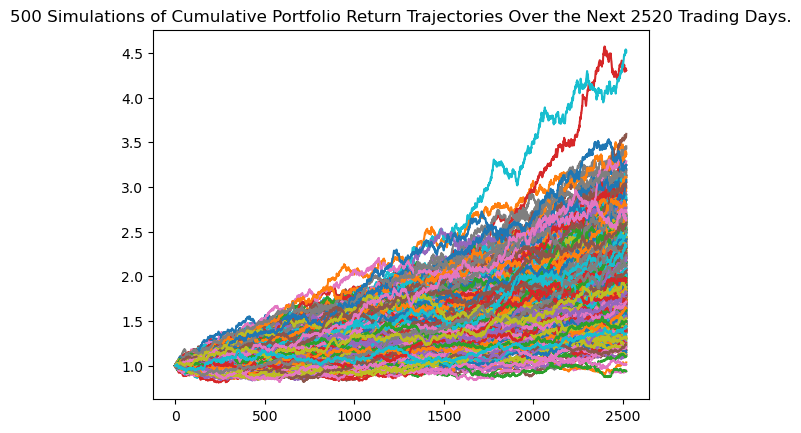

In [56]:
line_plot = MC_ten_year.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_Ten_year_sim_plot.png", bbox_inches="tight")

In [ ]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_ten_year_dist_plot.png',bbox_inches='tight')

In [58]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary_ten_monte = MC_ten_year.summarize_cumulative_return()
# Print summary statistics
print(summary_ten_monte)

count           500.000000
mean              1.999191
std               0.519797
min               0.936587
25%               1.637297
50%               1.906877
75%               2.325722
max               4.523790
95% CI Lower      1.188970
95% CI Upper      3.180015
Name: 2520, dtype: float64


In [59]:
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower_ten = round(summary_stats_five[8]*60000,2)
ci_upper_ten = round(summary_stats_five[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $60028.59 and $117960.3
